<h1>Long only Sharpe</h1>


In [212]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf


In [213]:
aapl = yf.download('AAPL', start='2019-06-10', end='2023-06-10')
aapl

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-06-10,47.952499,48.842499,47.904999,48.145000,46.711361,104883600
2019-06-11,48.715000,49.000000,48.400002,48.702499,47.252266,107731600
2019-06-12,48.487499,48.992500,48.347500,48.547501,47.101883,73012800
2019-06-13,48.674999,49.197498,48.400002,48.537498,47.092178,86698400
2019-06-14,47.887501,48.397499,47.575001,48.185001,46.750179,75046000
...,...,...,...,...,...,...
2023-06-05,182.630005,184.949997,178.039993,179.580002,179.580002,121946500
2023-06-06,179.970001,180.119995,177.429993,179.210007,179.210007,64848400
2023-06-07,178.440002,181.210007,177.320007,177.820007,177.820007,61944600


In [214]:
Dailyret = aapl.loc[:, 'Adj Close'].pct_change()
Dailyret.tail()

Date
2023-06-05   -0.007571
2023-06-06   -0.002060
2023-06-07   -0.007756
2023-06-08    0.015465
2023-06-09    0.002160
Name: Adj Close, dtype: float64

In [215]:
#3.75% risk free rate, yearly

excessret = Dailyret - 0.0375/252
excessret.tail()

Date
2023-06-05   -0.007720
2023-06-06   -0.002209
2023-06-07   -0.007905
2023-06-08    0.015316
2023-06-09    0.002011
Name: Adj Close, dtype: float64

In [216]:
Sharpelong = np.sqrt(1009)*np.mean(excessret) /np.std(excessret)
print('The sharpe for long only is: ', Sharpelong)

The sharpe for long only is:  1.0595069870356046


<h1>Long/Short Strategy Sharpe</h1>

In [217]:
spy = yf.download('SPY')
spy.tail()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-06-05,428.279999,429.619995,426.369995,427.100006,427.100006,65460200
2023-06-06,426.670013,428.579987,425.989990,428.029999,428.029999,64022200
2023-06-07,428.440002,429.619995,426.109985,426.549988,426.549988,85373300
2023-06-08,426.619995,429.600006,425.820007,429.130005,429.130005,61952800
2023-06-09,429.959991,431.989990,428.869995,429.899994,429.899994,85742800


In [218]:
df = pd.merge(aapl, spy, on='Date', suffixes=('_AAPL','_SPY'))

df

,Open_AAPL,High_AAPL,Low_AAPL,Close_AAPL,Adj Close_AAPL,Volume_AAPL,Open_SPY,High_SPY,Low_SPY,Close_SPY,Adj Close_SPY,Volume_SPY
Date,,,,,,,,,,,,
2019-06-10,47.952499,48.842499,47.904999,48.145000,46.711361,104883600,289.369995,290.820007,288.869995,288.970001,270.510895,60799100
2019-06-11,48.715000,49.000000,48.400002,48.702499,47.252266,107731600,290.989990,291.399994,288.179993,288.899994,270.445374,58641300
2019-06-12,48.487499,48.992500,48.347500,48.547501,47.101883,73012800,288.640015,289.260010,287.820007,288.390015,269.967896,47096300
2019-06-13,48.674999,49.197498,48.400002,48.537498,47.092178,86698400,289.399994,289.980011,288.619995,289.579987,271.081940,48945200
2019-06-14,47.887501,48.397499,47.575001,48.185001,46.750179,75046000,289.260010,289.929993,288.410004,289.260010,270.782410,52324700
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-05,182.630005,184.949997,178.039993,179.580002,179.580002,121946500,428.279999,429.619995,426.369995,427.100006,427.100006,65460200
2023-06-06,179.970001,180.119995,177.429993,179.210007,179.210007,64848400,426.670013,428.579987,425.989990,428.029999,428.029999,64022200
2023-06-07,178.440002,181.210007,177.320007,177.820007,177.820007,61944600,428.440002,429.619995,426.109985,426.549988,426.549988,85373300


In [219]:
Dailyret2 = df[['Adj Close_AAPL', 'Adj Close_SPY']].pct_change()
Dailyret2.rename(columns={"Adj Close_AAPL" : "AAPL","Adj Close_SPY" : "SPY"}, inplace=True)
Dailyret2.tail()

,AAPL,SPY
Date,,
2023-06-05,-0.007571,-0.001916
2023-06-06,-0.002060,0.002177
2023-06-07,-0.007756,-0.003458
2023-06-08,0.015465,0.006049
2023-06-09,0.002160,0.001794


In [220]:
netret = (Dailyret2['AAPL']-Dailyret2['SPY'])/2
print('Net returns \n', netret.tail())
sharpelongshort = np.sqrt(1009)*np.mean(netret) / np.std(netret)
print('The sharpe for long/short is: ', sharpelongshort)

Net returns 
 Date
2023-06-05   -0.002827
2023-06-06   -0.002119
2023-06-07   -0.002149
2023-06-08    0.004708
2023-06-09    0.000183
dtype: float64
The sharpe for long/short is:  1.2678255139539674


<h1>MaxDD and DD duration</h1>

In [221]:
def MaxDD(cumret):
    highwatermark = np.zeros(cumret.shape)
    dd = np.zeros(cumret.shape)
    ddduration = np.zeros(cumret.shape)
    
    
    for t in np.arange(1, cumret.shape[0]):
        highwatermark[t] = np.maximum(highwatermark[t-1],cumret[t])
        dd[t] = (1 + cumret[t]) / (1+highwatermark[t])-1
        if dd[t] == 0:
            ddduration == 0
        else:
            ddduration[t] = ddduration[t-1]+1
        
    MaxDD, i = np.min(dd), np.argmin(dd)                
    maxDDD=np.max(ddduration)
    return MaxDD, maxDDD, i        
        


(-0.11527738296630285, 220.0, 500)

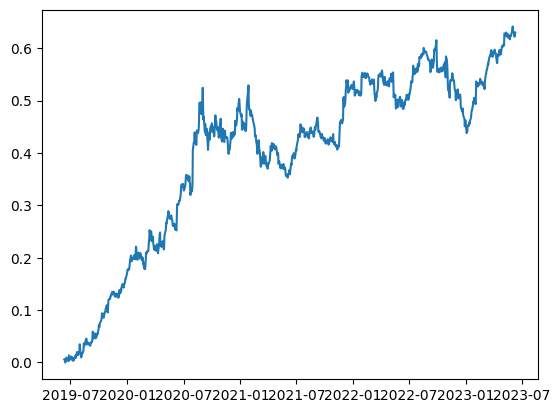

In [222]:
cumret = np.cumprod(1+netret)-1
plt.plot(cumret)
plt.bar(count())

MaxDD(cumret.values)